# Bibliotecas


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
import geopandas as gpd
import warnings
import plotly.express as px
import numpy as np
import seaborn as sns

# Análise descritiva 

In [2]:
df_inicial = pd.read_excel("BASEDEDADOS\DADOS.xlsx")
df_inicial.head(5)

,CODIGO,Cidades,População Total,Variação absoluta da população residente 2010 compatibilizada,Taxa de crescimento geométrico,Densidade demográfica (Habitante por quilômetro quadrado),Média de moradores em domicílios particulares permanentes ocupados,agua,lixo,energia,...,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Esperança de vida ao nascer 2010,% de 18 anos ou mais de idade com ensino fundamental completo 2010,% de extremamente pobres 2010,% de pobres 2010,Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%),Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%),"Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)"
0,2900108,Abaíra (BA),7301,-1540,-1.58,13.55,2722,0.915695,0.548563,0.967366,...,0.577,0.746,0.510,69.76,28.90,18.39,31.74,6.16,13.31,80.53
1,2900603,Aiquara (BA),4446,-202,-0.37,26.48,1505,0.584253,0.701251,0.948492,...,0.573,0.733,0.471,69.00,33.13,11.27,27.11,25.60,9.24,65.16
2,2901205,Anagé (BA),25438,15,0.00,13.39,8875,0.262053,0.236911,0.889487,...,0.549,0.771,0.371,71.27,20.04,21.74,39.06,7.74,13.08,79.18
3,2901957,Apuarema (BA),6913,-550,-0.64,45.83,2489,0.622222,0.707329,0.896454,...,0.555,0.735,0.413,69.09,24.88,13.05,39.49,23.86,9.67,66.46
4,2902005,Aracatu (BA),13936,193,0.12,9.35,4607,0.301096,0.292055,0.754247,...,0.591,0.754,0.439,70.25,22.09,12.39,28.51,11.47,12.12,76.41


In [3]:
df_inicial.drop('Cidades', axis=1, inplace=True)

In [4]:
df_inicial.drop('esgoto sanitario', axis=1, inplace=True)

In [5]:
def df_informacoes(df):
    df_info = pd.DataFrame({'Não Nulos': df.notnull().sum(),
                'Nulos': df.isnull().sum(),
                '% Nulos': ((df.isnull().sum()/df.notnull().sum())*100).round(2),
                'Unicos': df.nunique(),
                'Dtype': df.dtypes})
    df_info.index.name = 'Columns'
    return df_info

In [6]:
df_informacoes(df_inicial)

,Não Nulos,Nulos,% Nulos,Unicos,Dtype
Columns,,,,,
CODIGO,77,0,0.0,77,int64
População Total,77,0,0.0,77,int64
Variação absoluta da população residente 2010 compatibilizada,77,0,0.0,77,int64
Taxa de crescimento geométrico,77,0,0.0,64,float64
Densidade demográfica (Habitante por quilômetro quadrado),77,0,0.0,75,float64
Média de moradores em domicílios particulares permanentes ocupados,77,0,0.0,77,int64
agua,77,0,0.0,77,float64
lixo,77,0,0.0,77,float64
energia,77,0,0.0,77,float64


In [7]:
# Dicionário de mapeamento para os novos nomes de coluna
novos_nomes = {
    'População Total': 'População Total',
    'Variação absoluta da população residente 2010 compatibilizada': 'Variação absoluta',
    'Taxa de crescimento geométrico': 'Taxa de crescimento',
    'Densidade demográfica (Habitante por quilômetro quadrado)': 'Densidade demográfica',
    'Média de moradores em domicílios particulares permanentes ocupados': 'Média de moradores',
    'agua': 'Água',
    'lixo': 'Lixo',
    'energia': 'Energia',
    'esgoto banheiro': 'Esgoto',
    'condições do entorno': 'Condições do Entorno',
    'IDHM 2010': 'IDHM 2010',
    'IDHM Renda 2010': 'IDHM Renda 2010',
    'IDHM Longevidade 2010': 'IDHM Longevidade 2010',
    'IDHM Educação 2010': 'IDHM Educação 2010',
    'Esperança de vida ao nascer 2010': 'Esperança de Vida ao Nascer',
    '% de 18 anos ou mais de idade com ensino fundamental completo 2010': '18 anos ou mais com E.M.C',
    '% de extremamente pobres 2010': 'Extremamente Pobres',
    '% de pobres 2010': 'Pobres',
    'Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%)': 'Participação Agropecuária',
    'Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%)': 'Participação Indústria',
    'Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)': 'Participação Serviços'
}

# Renomear as colunas usando o método rename
df_inicial.rename(columns=novos_nomes, inplace=True)


In [8]:
df_inicial

Columns,CODIGO,População Total,Variação absoluta,Taxa de crescimento,Densidade demográfica,Média de moradores,Água,Lixo,Energia,Esgoto,...,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Esperança de Vida ao Nascer,18 anos ou mais com E.M.C,Extremamente Pobres,Pobres,Participação Agropecuária,Participação Indústria,Participação Serviços
0,2900108,7301,-1540,-1.58,13.55,2722,0.915695,0.548563,0.967366,0.095960,...,0.577,0.746,0.510,69.76,28.90,18.39,31.74,6.16,13.31,80.53
1,2900603,4446,-202,-0.37,26.48,1505,0.584253,0.701251,0.948492,0.589404,...,0.573,0.733,0.471,69.00,33.13,11.27,27.11,25.60,9.24,65.16
2,2901205,25438,15,0.00,13.39,8875,0.262053,0.236911,0.889487,0.078049,...,0.549,0.771,0.371,71.27,20.04,21.74,39.06,7.74,13.08,79.18
3,2901957,6913,-550,-0.64,45.83,2489,0.622222,0.707329,0.896454,0.396217,...,0.555,0.735,0.413,69.09,24.88,13.05,39.49,23.86,9.67,66.46
4,2902005,13936,193,0.12,9.35,4607,0.301096,0.292055,0.754247,0.004110,...,0.591,0.754,0.439,70.25,22.09,12.39,28.51,11.47,12.12,76.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2931608,15332,1451,0.83,52.91,4735,0.362331,0.386357,0.774924,0.210715,...,0.541,0.756,0.418,70.38,28.61,17.74,44.84,18.29,11.32,70.39
73,2931806,16296,-1759,-0.85,8.11,5882,0.345684,0.261437,0.792797,0.057338,...,0.545,0.749,0.360,69.94,19.18,24.25,42.90,8.62,12.30,79.08
74,2932309,16111,-8161,-3.36,90.69,5865,0.690729,0.745055,0.908031,0.500590,...,0.586,0.788,0.452,72.29,35.66,14.63,40.02,8.07,13.52,78.41
75,2933307,370868,64854,1.61,113.97,129081,0.873097,0.891175,0.989498,0.495027,...,0.681,0.788,0.581,72.30,49.26,5.60,18.07,2.55,18.53,78.92


In [9]:
# Calcule a matriz de correlação
correlation_matrix = df_inicial.corr()

# Encontre pares de colunas com correlação maior que 0.9
high_correlation_pairs = []
threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            high_correlation_pairs.append((col1, col2, correlation))

# Ordenar a lista high_correlation_pairs com base na correlação em ordem decrescente
sorted_high_correlation_pairs = sorted(high_correlation_pairs, key=lambda x: x[2], reverse=True)

# Imprimir os pares de colunas com correlação alta ordenados do maior para o menor
print("Os pares de colunas com correlação alta ordenados do maior para o menor:")
for pair in sorted_high_correlation_pairs:
    col1, col2, correlation = pair
    print(f"Correlação entre {col1} e {col2}: {correlation}")

Os pares de colunas com correlação alta ordenados do maior para o menor:
Correlação entre Esperança de Vida ao Nascer e IDHM Longevidade 2010: 0.999946640895608
Correlação entre Média de moradores e População Total: 0.9996924459206922
Correlação entre IDHM Educação 2010 e IDHM 2010: 0.9394707799191884
Correlação entre Condições do Entorno e Lixo: 0.9238101779273717
Correlação entre Variação absoluta e População Total: 0.9104812000965319
Correlação entre 18 anos ou mais com E.M.C e IDHM 2010: 0.9092726057025339
Correlação entre Média de moradores e Variação absoluta: 0.9033342717379026
Correlação entre Pobres e Extremamente Pobres: 0.8841354221064687
Correlação entre Condições do Entorno e Esgoto: 0.8806295715076548
Correlação entre 18 anos ou mais com E.M.C e IDHM Educação 2010: 0.8684227842644328
Correlação entre Condições do Entorno e Água: 0.8561873839907362
Correlação entre IDHM Renda 2010 e IDHM 2010: 0.8476527736911029
Correlação entre 18 anos ou mais com E.M.C e IDHM Renda 2010:

In [10]:
# Ordenar a lista high_correlation_pairs com base na correlação em ordem decrescente
sorted_high_correlation_pairs = sorted(high_correlation_pairs, key=lambda x: x[2], reverse=True)

# Pegar os 10 maiores pares de colunas
top_10_high_correlation_pairs = sorted_high_correlation_pairs[:10]

# Imprimir os 10 maiores pares de colunas com correlação alta
print("Os 10 maiores pares de colunas com correlação alta:")
for pair in top_10_high_correlation_pairs:
    col1, col2, correlation = pair
    print(f"Correlação entre {col1} e {col2}: {correlation}")


Os 10 maiores pares de colunas com correlação alta:
Correlação entre Esperança de Vida ao Nascer e IDHM Longevidade 2010: 0.999946640895608
Correlação entre Média de moradores e População Total: 0.9996924459206922
Correlação entre IDHM Educação 2010 e IDHM 2010: 0.9394707799191884
Correlação entre Condições do Entorno e Lixo: 0.9238101779273717
Correlação entre Variação absoluta e População Total: 0.9104812000965319
Correlação entre 18 anos ou mais com E.M.C e IDHM 2010: 0.9092726057025339
Correlação entre Média de moradores e Variação absoluta: 0.9033342717379026
Correlação entre Pobres e Extremamente Pobres: 0.8841354221064687
Correlação entre Condições do Entorno e Esgoto: 0.8806295715076548
Correlação entre 18 anos ou mais com E.M.C e IDHM Educação 2010: 0.8684227842644328


In [11]:
# análise de correlação

correlation = df_inicial.corr()

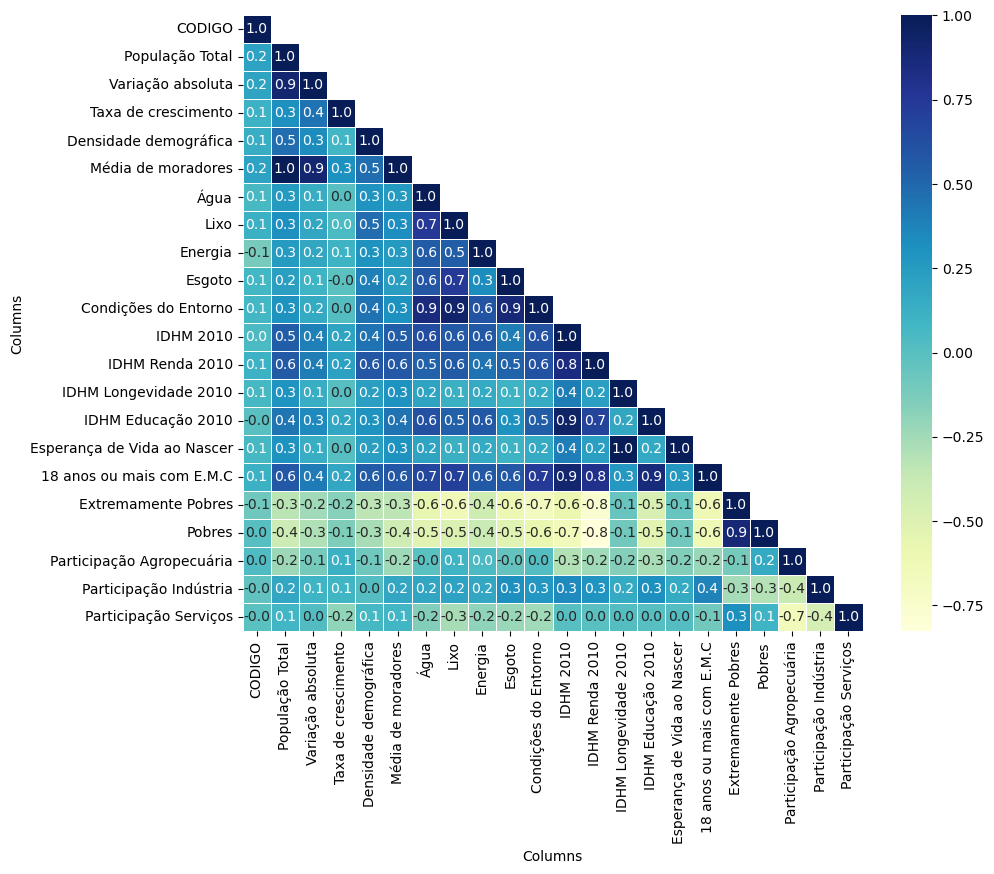

In [12]:
# Criar uma máscara para a metade inferior (excluindo a diagonal)
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o heatmap com a máscara e a cor azul
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6, mask=mask, cmap='YlGnBu')

# Exibir o gráfico
plt.show()

In [13]:
# Calcula a matriz de correlação
corr_matrix = df_inicial.corrwith(df_inicial['População Total'])

# Cria um DataFrame com as correlações
corr_df = pd.DataFrame({'Correlação': corr_matrix})

# Ordena as correla��es em ordem decrescente
corr_df = corr_df.sort_values(by='Correlação', ascending=False)

# Mostra o DataFrame com as correlações
print(corr_df)

                             Correlação
Columns                                
População Total                1.000000
Média de moradores             0.999692
Variação absoluta              0.910481
18 anos ou mais com E.M.C      0.578174
IDHM Renda 2010                0.563795
IDHM 2010                      0.541057
Densidade demográfica          0.464655
IDHM Educação 2010             0.437689
Lixo                           0.320339
Taxa de crescimento            0.316449
Condições do Entorno           0.301355
Esperança de Vida ao Nascer    0.301194
IDHM Longevidade 2010          0.299752
Água                           0.258344
Energia                        0.256905
Esgoto                         0.222719
CODIGO                         0.210294
Participação Indústria         0.179921
Participação Serviços          0.079983
Participação Agropecuária     -0.234759
Extremamente Pobres           -0.332191
Pobres                        -0.406192


In [14]:
df1 = pd.read_excel("BASEDEDADOS\DADOS.xlsx")


In [15]:
# Remover '(BA)' da coluna 'Cidades' e salvar a mudança no DataFrame
df1['Cidades'] = df1['Cidades'].str.replace('(BA)', '').str.strip()

In [16]:
df1.describe()



,CODIGO,População Total,Variação absoluta da população residente 2010 compatibilizada,Taxa de crescimento geométrico,Densidade demográfica (Habitante por quilômetro quadrado),Média de moradores em domicílios particulares permanentes ocupados,agua,lixo,energia,esgoto banheiro,...,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Esperança de vida ao nascer 2010,% de 18 anos ou mais de idade com ensino fundamental completo 2010,% de extremamente pobres 2010,% de pobres 2010,Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%),Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%),"Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)"
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.915762e+06,23244.909091,513.688312,-0.356883,28.241818,8128.844156,0.631576,0.595029,0.910381,0.299297,...,0.572688,0.755935,0.453571,70.352468,28.951948,17.025974,36.569351,15.419351,13.508961,71.071558
std,9.096567e+03,45145.454709,7772.199552,1.016496,26.947422,15834.810603,0.193082,0.195996,0.062963,0.257863,...,0.033774,0.027281,0.050630,1.638585,6.484104,6.273708,8.023141,9.704832,8.224906,9.982532
min,2.900108e+06,4075.000000,-8161.000000,-3.360000,4.430000,1505.000000,0.053877,0.223830,0.741034,0.001231,...,0.522000,0.690000,0.360000,66.400000,19.180000,2.660000,12.260000,1.470000,6.720000,26.170000
25%,2.908804e+06,8731.000000,-1056.000000,-0.790000,12.510000,3015.000000,0.548191,0.464552,0.879040,0.047051,...,0.547000,0.740000,0.418000,69.370000,24.980000,12.810000,31.740000,7.740000,10.530000,66.510000
50%,2.916708e+06,13690.000000,-376.000000,-0.280000,17.880000,4607.000000,0.635549,0.592045,0.932268,0.244702,...,0.566000,0.760000,0.456000,70.590000,28.610000,17.290000,37.030000,14.160000,12.040000,72.760000
75%,2.922706e+06,21006.000000,197.000000,0.260000,31.990000,7239.000000,0.756490,0.756104,0.956617,0.517180,...,0.586000,0.772000,0.482000,71.290000,31.880000,21.500000,42.420000,21.490000,12.960000,78.620000
max,2.933505e+06,370868.000000,64854.000000,2.080000,145.140000,129081.000000,0.956981,0.963978,0.989498,0.899554,...,0.687000,0.807000,0.581000,73.410000,49.260000,32.050000,53.410000,42.380000,67.950000,82.810000


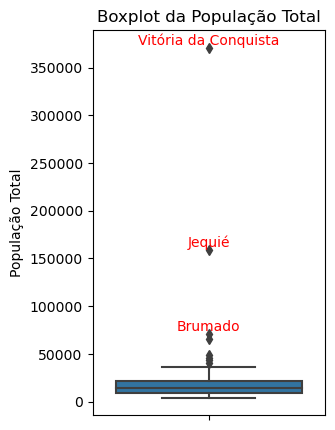

In [17]:
# Crie um boxplot da variável "População Total"
plt.figure(figsize=(3, 5))
sns.boxplot(y=df1['População Total'], orient='v')
plt.title('Boxplot da População Total')
plt.ylabel('População Total')

# Identifique e exiba as cidades que são outliers no gráfico
Q1 = df1['População Total'].quantile(0.25)
Q3 = df1['População Total'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = df1[df1['População Total'] > limite_superior]

# Ordene os outliers em ordem decrescente
outliers = outliers.sort_values(by='População Total', ascending=False)

# Exiba somente os nomes das 3 maiores cidades como etiquetas
for index, row in outliers.head(3).iterrows():
    plt.text(0, row['População Total'], row['Cidades'], ha='center', va='bottom', fontsize=10, color='red')

plt.show()

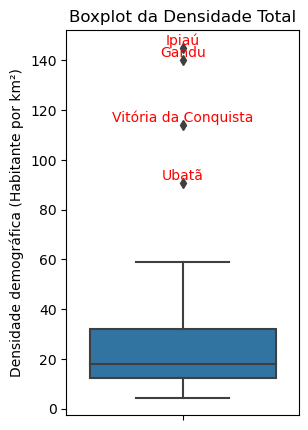

In [18]:
# Crie um boxplot da variável "População Total"
plt.figure(figsize=(3, 5))
sns.boxplot(y=df1['Densidade demográfica (Habitante por quilômetro quadrado)'], orient='v')
plt.title('Boxplot da Densidade Total')
plt.ylabel('Densidade demográfica (Habitante por km²)')

# Identifique e exiba as cidades que são outliers no gráfico
Q1 = df1['Densidade demográfica (Habitante por quilômetro quadrado)'].quantile(0.25)
Q3 = df1['Densidade demográfica (Habitante por quilômetro quadrado)'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = df1[df1['Densidade demográfica (Habitante por quilômetro quadrado)'] > limite_superior]

for index, row in outliers.iterrows():
    plt.text(0, row['Densidade demográfica (Habitante por quilômetro quadrado)'], row['Cidades'], ha='center', va='bottom', fontsize=10, color='red')

plt.show()

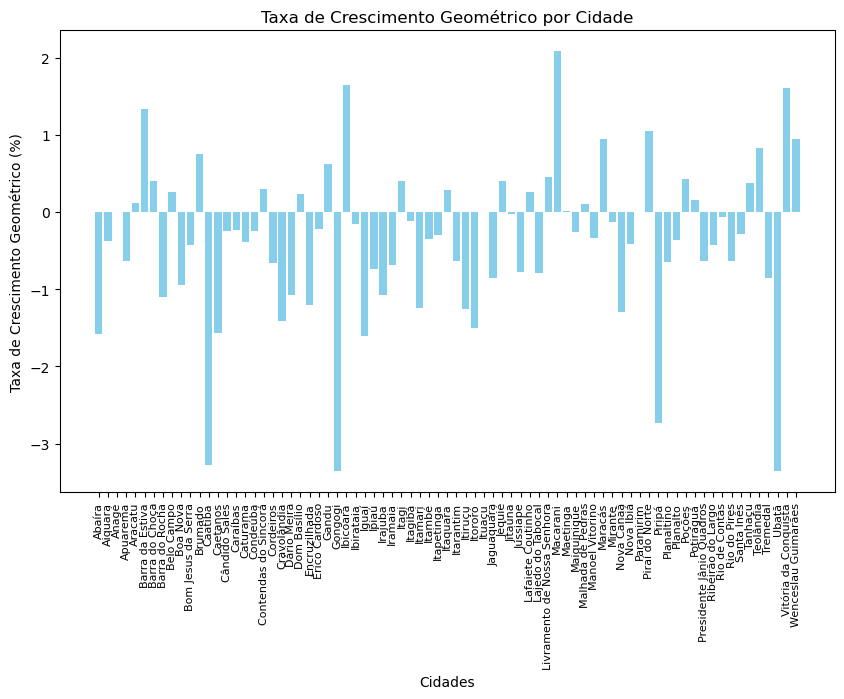

In [19]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras
plt.bar(df1['Cidades'], df1['Taxa de crescimento geométrico'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Taxa de Crescimento Geométrico (%)')
plt.title('Taxa de Crescimento Geométrico por Cidade')

# Rotacionar os rótulos do eixo x e diminuir o tamanho
plt.xticks(rotation=90, fontsize='8')

# Exibir o gráfico
plt.show()

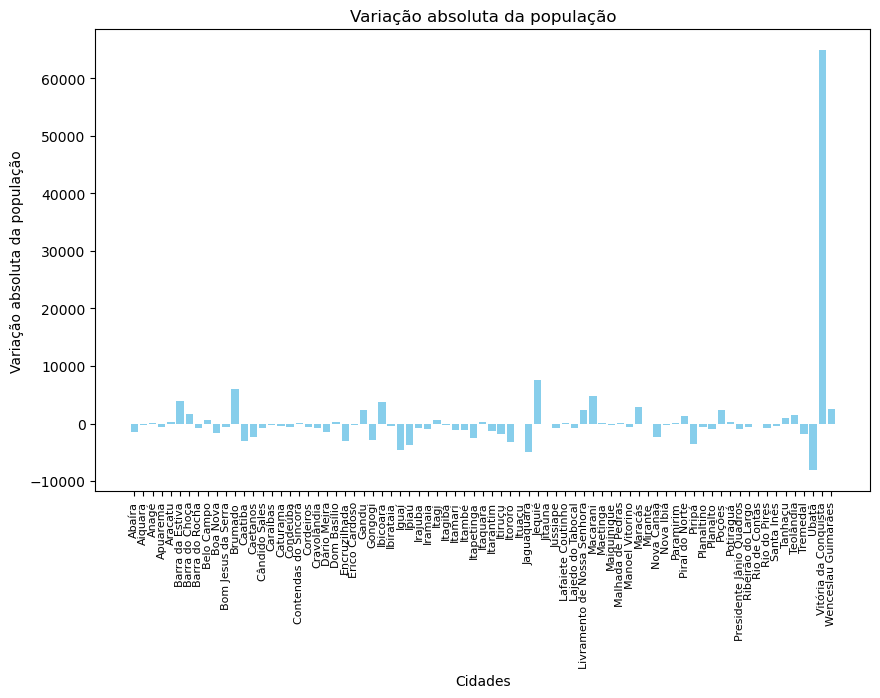

In [20]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras
plt.bar(df1['Cidades'], df1['Variação absoluta da população residente 2010 compatibilizada'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Variação absoluta da população')
plt.title('Variação absoluta da população')

# Rotacionar os rótulos do eixo x e diminuir o tamanho
plt.xticks(rotation=90, fontsize='8')

# Exibir o gráfico
plt.show()

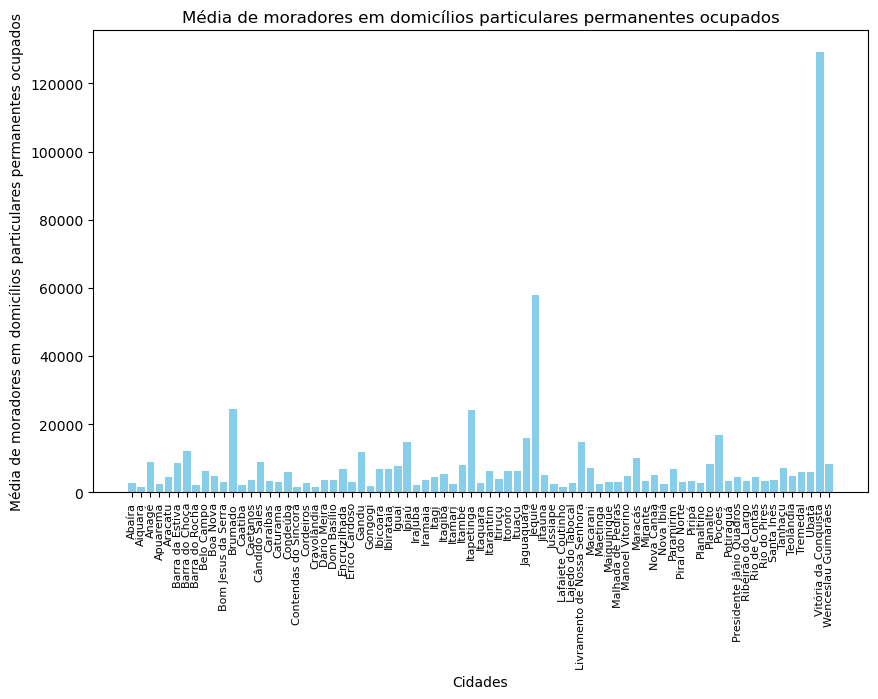

In [21]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras
plt.bar(df1['Cidades'], df1['Média de moradores em domicílios particulares permanentes ocupados'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Média de moradores em domicílios particulares permanentes ocupados')
plt.title('Média de moradores em domicílios particulares permanentes ocupados')

# Rotacionar os rótulos do eixo x e diminuir o tamanho
plt.xticks(rotation=90, fontsize='8')

# Exibir o gráfico
plt.show()

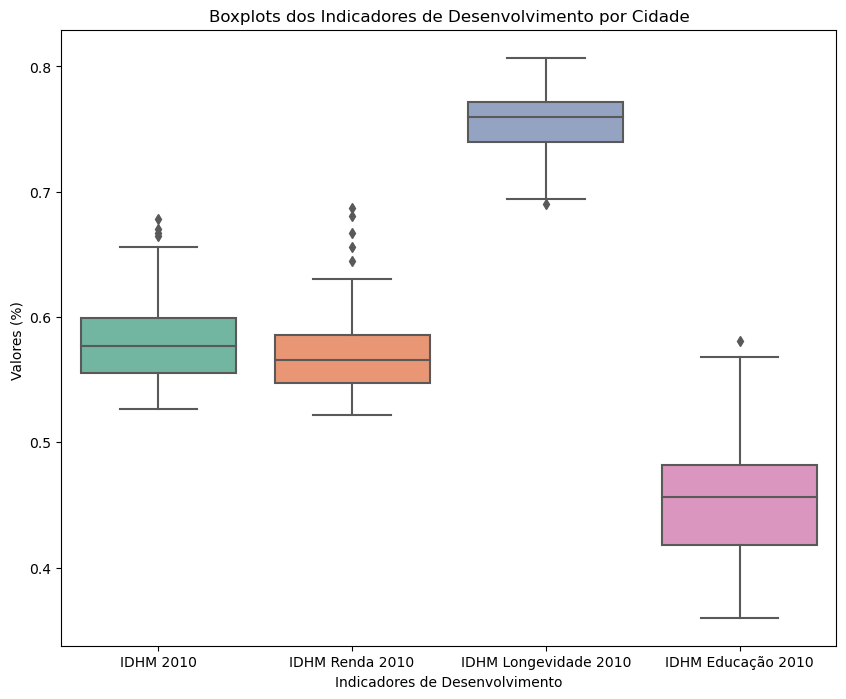

In [22]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar boxplots para as variáveis
sns.boxplot(df1[['IDHM 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010']], palette="Set2")

# Adicionar rótulos e título
plt.xlabel('Indicadores de Desenvolvimento')
plt.ylabel('Valores (%) ')
plt.title('Boxplots dos Indicadores de Desenvolvimento por Cidade')

# Exibir o gráfico
plt.show()

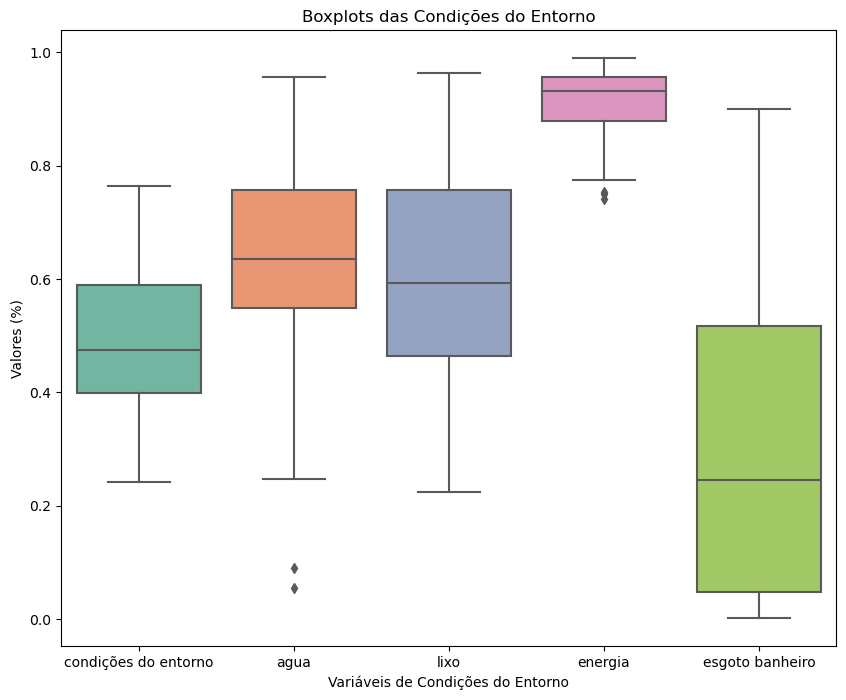

In [23]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar boxplots para as variáveis
sns.boxplot(df1[['condições do entorno', 'agua', 'lixo', 'energia', 'esgoto banheiro']], palette="Set2")

# Adicionar rótulos e título
plt.xlabel('Variáveis de Condições do Entorno')
plt.ylabel('Valores (%)')
plt.title('Boxplots das Condições do Entorno')

# Exibir o gráfico
plt.show()

In [24]:
# Dicionário de mapeamento para os novos nomes de coluna
novos_nomes = {

    'Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%)': 'Participação Agropecuária',
    'Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%)': 'Participação Indústria',
    'Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)': 'Participação Serviços'
}

# Renomear as colunas usando o método rename
df1.rename(columns=novos_nomes, inplace=True)

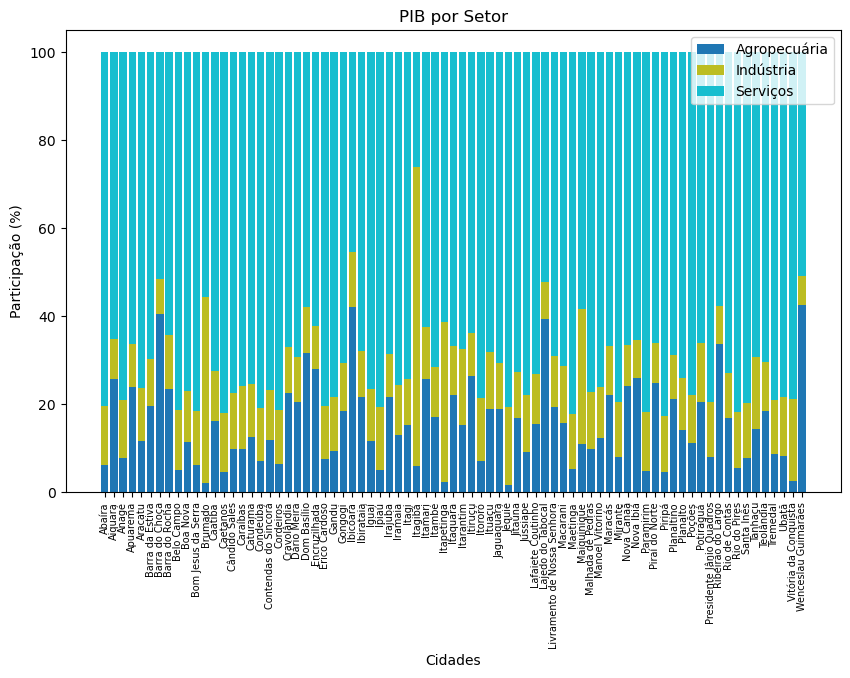

In [25]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras acumulado
plt.bar(df1['Cidades'], df1['Participação Agropecuária'], label='Agropecuária', color='tab:blue')
plt.bar(df1['Cidades'], df1['Participação Indústria'], label='Indústria', bottom=df1['Participação Agropecuária'], color='tab:olive')
plt.bar(df1['Cidades'], df1['Participação Serviços'], label='Serviços', bottom=df1['Participação Agropecuária'] + df1['Participação Indústria'], color='tab:cyan')

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Participação (%)')
plt.title('PIB por Setor')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, fontsize=7)

# Exibir o gráfico
plt.show()

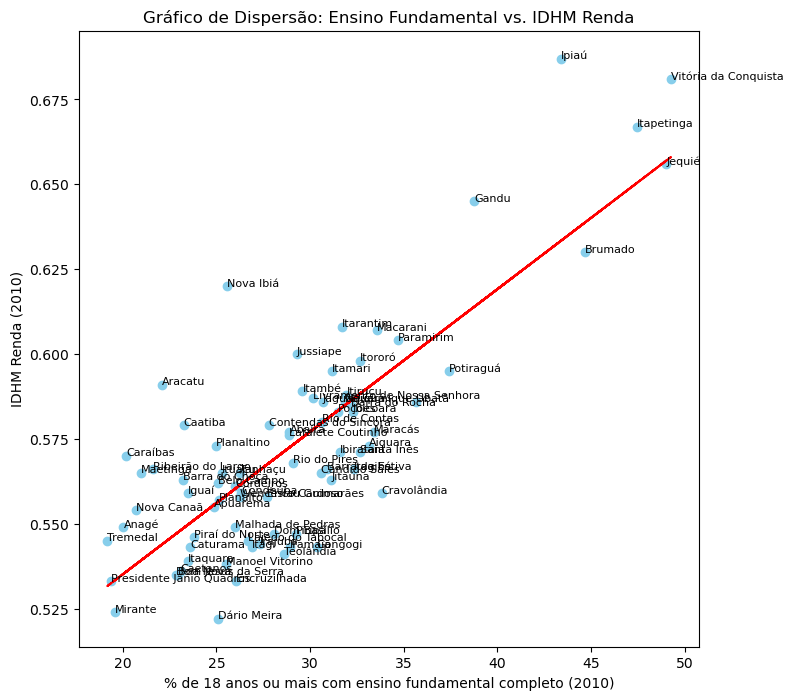

In [26]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 8))

# Criar um gráfico de dispersão
plt.scatter(df1['% de 18 anos ou mais de idade com ensino fundamental completo 2010'], df1['IDHM Renda 2010'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('% de 18 anos ou mais com ensino fundamental completo (2010)')
plt.ylabel('IDHM Renda (2010)')
plt.title('Gráfico de Dispersão: Ensino Fundamental vs. IDHM Renda')

# Adicionar o nome das cidades
for i, cidade in enumerate(df1['Cidades']):
    plt.annotate(cidade, (df1['% de 18 anos ou mais de idade com ensino fundamental completo 2010'][i], df1['IDHM Renda 2010'][i]), fontsize=8)

# Adicionar a linha de tendência
z = np.polyfit(df1['% de 18 anos ou mais de idade com ensino fundamental completo 2010'], df1['IDHM Renda 2010'], 1)
p = np.poly1d(z)
plt.plot(df1['% de 18 anos ou mais de idade com ensino fundamental completo 2010'], p(df1['% de 18 anos ou mais de idade com ensino fundamental completo 2010']), "r--")

# Exibir o gráfico
plt.show()

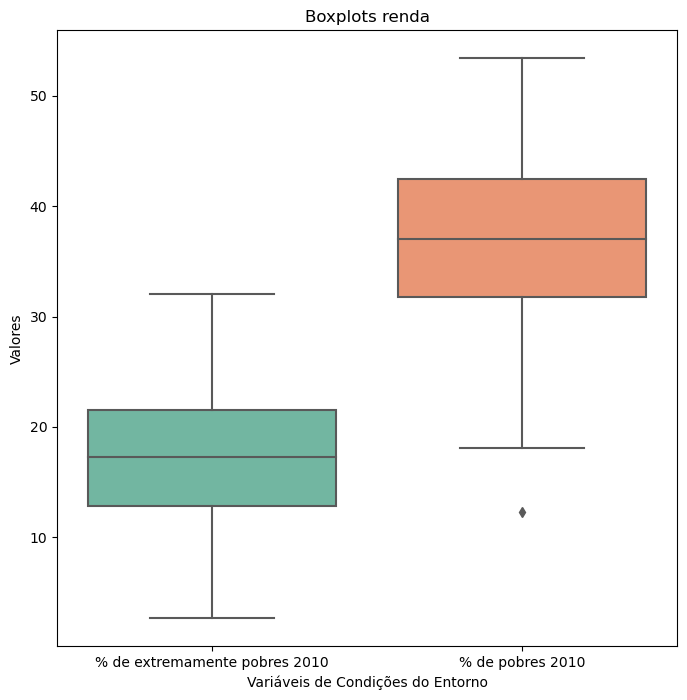

In [27]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 8))

# Criar boxplots para as variáveis
sns.boxplot(df1[['% de extremamente pobres 2010','% de pobres 2010']], palette="Set2")

# Adicionar rótulos e título
plt.xlabel('Variáveis de Condições do Entorno')
plt.ylabel('Valores')
plt.title('Boxplots renda')

# Exibir o gráfico
plt.show()

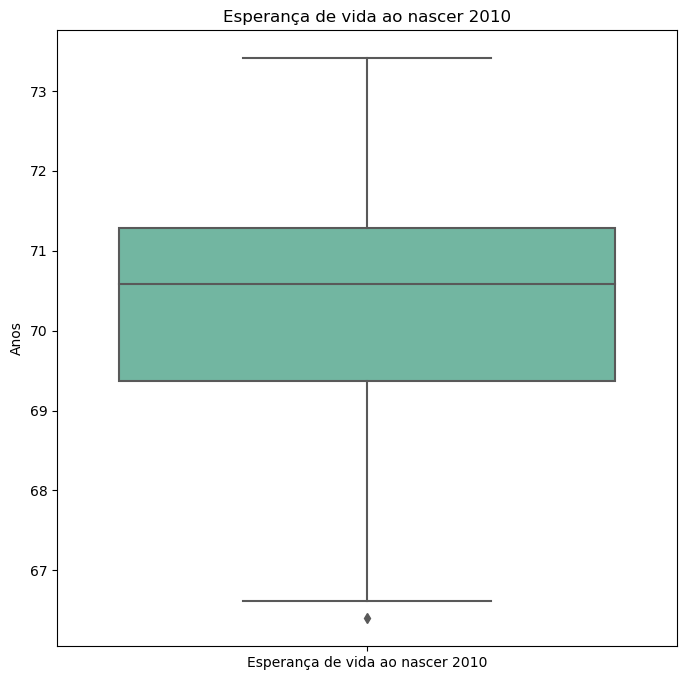

In [28]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 8))

# Criar boxplots para as variáveis
sns.boxplot(df1[['Esperança de vida ao nascer 2010']], palette="Set2")

# Adicionar rótulos e título

plt.ylabel('Anos')
plt.title('Esperança de vida ao nascer 2010')

# Exibir o gráfico
plt.show()

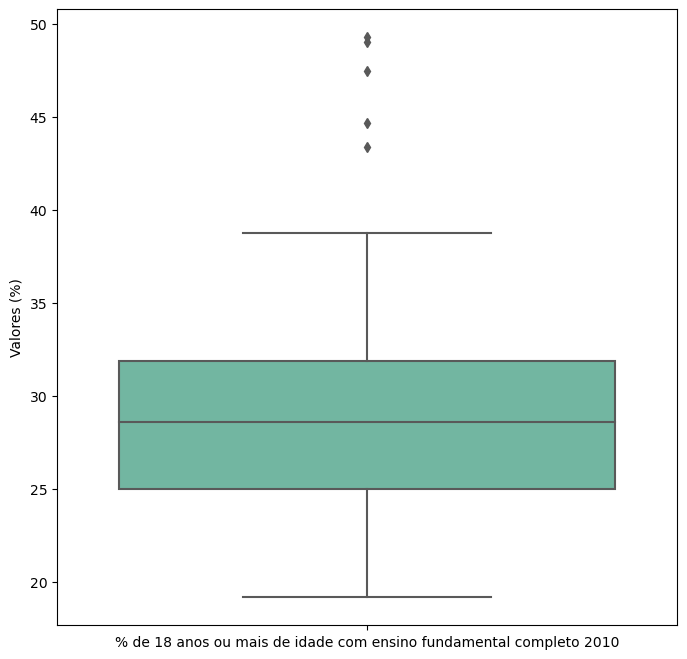

In [29]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 8))

# Criar boxplots para as variáveis
sns.boxplot(df1[['% de 18 anos ou mais de idade com ensino fundamental completo 2010']], palette="Set2")

# Adicionar rótulos e título

plt.ylabel('Valores (%)')


# Exibir o gráfico
plt.show()

# Criando um geo dataframe

In [30]:
df = pd.read_excel("BASEDEDADOS\DADOS.xlsx")
df.head()

,CODIGO,Cidades,População Total,Variação absoluta da população residente 2010 compatibilizada,Taxa de crescimento geométrico,Densidade demográfica (Habitante por quilômetro quadrado),Média de moradores em domicílios particulares permanentes ocupados,agua,lixo,energia,...,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Esperança de vida ao nascer 2010,% de 18 anos ou mais de idade com ensino fundamental completo 2010,% de extremamente pobres 2010,% de pobres 2010,Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%),Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%),"Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)"
0,2900108,Abaíra (BA),7301,-1540,-1.58,13.55,2722,0.915695,0.548563,0.967366,...,0.577,0.746,0.510,69.76,28.90,18.39,31.74,6.16,13.31,80.53
1,2900603,Aiquara (BA),4446,-202,-0.37,26.48,1505,0.584253,0.701251,0.948492,...,0.573,0.733,0.471,69.00,33.13,11.27,27.11,25.60,9.24,65.16
2,2901205,Anagé (BA),25438,15,0.00,13.39,8875,0.262053,0.236911,0.889487,...,0.549,0.771,0.371,71.27,20.04,21.74,39.06,7.74,13.08,79.18
3,2901957,Apuarema (BA),6913,-550,-0.64,45.83,2489,0.622222,0.707329,0.896454,...,0.555,0.735,0.413,69.09,24.88,13.05,39.49,23.86,9.67,66.46
4,2902005,Aracatu (BA),13936,193,0.12,9.35,4607,0.301096,0.292055,0.754247,...,0.591,0.754,0.439,70.25,22.09,12.39,28.51,11.47,12.12,76.41


In [31]:
regiao = gpd.read_file('MAPA\intermediaria.shp')
regiao.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2900108,Abaíra,BA,538.677,"POLYGON ((-41.74667 -13.32509, -41.74679 -13.3..."
1,2900504,Érico Cardoso,BA,735.249,"POLYGON ((-42.11226 -13.50995, -42.12296 -13.5..."
2,2900603,Aiquara,BA,167.877,"POLYGON ((-39.83121 -14.08248, -39.83118 -14.0..."
3,2901205,Anagé,BA,1899.683,"POLYGON ((-40.70262 -14.44710, -40.70247 -14.4..."
4,2901957,Apuarema,BA,150.830,"POLYGON ((-39.74865 -13.86419, -39.74867 -13.8..."


In [32]:
regiao.rename(columns={'CD_MUN': 'CODIGO'})
regiao.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2900108,Abaíra,BA,538.677,"POLYGON ((-41.74667 -13.32509, -41.74679 -13.3..."
1,2900504,Érico Cardoso,BA,735.249,"POLYGON ((-42.11226 -13.50995, -42.12296 -13.5..."
2,2900603,Aiquara,BA,167.877,"POLYGON ((-39.83121 -14.08248, -39.83118 -14.0..."
3,2901205,Anagé,BA,1899.683,"POLYGON ((-40.70262 -14.44710, -40.70247 -14.4..."
4,2901957,Apuarema,BA,150.830,"POLYGON ((-39.74865 -13.86419, -39.74867 -13.8..."


In [33]:
regiao.dtypes

CD_MUN        object
NM_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dtype: object

In [34]:
regiao.rename(columns={'CD_MUN': 'CODIGO'}, inplace=True)

In [35]:
regiao['CODIGO'] = regiao['CODIGO'].astype(float)

In [36]:
df_unido = pd.merge(df, regiao, on='CODIGO')

# Exibindo o DataFrame resultante
df_unido.head()

,CODIGO,Cidades,População Total,Variação absoluta da população residente 2010 compatibilizada,Taxa de crescimento geométrico,Densidade demográfica (Habitante por quilômetro quadrado),Média de moradores em domicílios particulares permanentes ocupados,agua,lixo,energia,...,% de 18 anos ou mais de idade com ensino fundamental completo 2010,% de extremamente pobres 2010,% de pobres 2010,Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%),Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%),"Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)",NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2900108,Abaíra (BA),7301,-1540,-1.58,13.55,2722,0.915695,0.548563,0.967366,...,28.90,18.39,31.74,6.16,13.31,80.53,Abaíra,BA,538.677,"POLYGON ((-41.74667 -13.32509, -41.74679 -13.3..."
1,2900603,Aiquara (BA),4446,-202,-0.37,26.48,1505,0.584253,0.701251,0.948492,...,33.13,11.27,27.11,25.60,9.24,65.16,Aiquara,BA,167.877,"POLYGON ((-39.83121 -14.08248, -39.83118 -14.0..."
2,2901205,Anagé (BA),25438,15,0.00,13.39,8875,0.262053,0.236911,0.889487,...,20.04,21.74,39.06,7.74,13.08,79.18,Anagé,BA,1899.683,"POLYGON ((-40.70262 -14.44710, -40.70247 -14.4..."
3,2901957,Apuarema (BA),6913,-550,-0.64,45.83,2489,0.622222,0.707329,0.896454,...,24.88,13.05,39.49,23.86,9.67,66.46,Apuarema,BA,150.830,"POLYGON ((-39.74865 -13.86419, -39.74867 -13.8..."
4,2902005,Aracatu (BA),13936,193,0.12,9.35,4607,0.301096,0.292055,0.754247,...,22.09,12.39,28.51,11.47,12.12,76.41,Aracatu,BA,1489.803,"POLYGON ((-41.40896 -14.55663, -41.43440 -14.5..."


In [37]:
df_unido.columns

Index(['CODIGO', 'Cidades', 'População Total',
       'Variação absoluta da população residente 2010 compatibilizada',
       'Taxa de crescimento geométrico',
       'Densidade demográfica (Habitante por quilômetro quadrado)',
       'Média de moradores em domicílios particulares permanentes ocupados',
       'agua', 'lixo', 'energia', 'esgoto banheiro', 'esgoto sanitario',
       'condições do entorno', 'IDHM 2010', 'IDHM Renda 2010',
       'IDHM Longevidade 2010', 'IDHM Educação 2010',
       'Esperança de vida ao nascer 2010',
       '% de 18 anos ou mais de idade com ensino fundamental completo 2010',
       '% de extremamente pobres 2010', '% de pobres 2010',
       'Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%)',
       'Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%)',
       'Participação do valor adicionado bruto a p

# Mapa de correlação - Condições dos domicílios

In [38]:
# Desativando os avisos temporariamente
warnings.filterwarnings("ignore")

# Convertendo a coluna 'geometry' para GeoDataFrame
gdf = gpd.GeoDataFrame(df_unido, geometry='geometry')

# Extraindo as latitudes e longitudes dos centroides
df_unido['Latitude'] = gdf['geometry'].centroid.y
df_unido['Longitude'] = gdf['geometry'].centroid.x

# Exibindo as latitudes e longitudes no DataFrame
print(df_unido[['CODIGO', 'Latitude', 'Longitude']])


     CODIGO   Latitude  Longitude
0   2900108 -13.296569 -41.742894
1   2900603 -14.091819 -39.880862
2   2901205 -14.589900 -40.927717
3   2901957 -13.820034 -39.751570
4   2902005 -14.371226 -41.374548
..      ...        ...        ...
72  2931608 -13.554433 -39.497483
73  2931806 -15.053560 -41.471966
74  2932309 -14.096416 -39.521853
75  2933307 -15.022284 -40.913164
76  2933505 -13.628550 -39.619254

[77 rows x 3 columns]


In [39]:
novos_nomes = {
    'População Total': 'População Total',
    'Variação absoluta da população residente 2010 compatibilizada': 'Variação absoluta',
    'Taxa de crescimento geométrico': 'Taxa de crescimento',
    'Densidade demográfica (Habitante por quilômetro quadrado)': 'Densidade demográfica',
    'Média de moradores em domicílios particulares permanentes ocupados': 'Média de moradores',
    'agua': 'Água',
    'lixo': 'Lixo',
    'energia': 'Energia',
    'esgoto banheiro': 'Esgoto',
    'condições do entorno': 'Condições do Entorno',
    'IDHM 2010': 'IDHM 2010',
    'IDHM Renda 2010': 'IDHM Renda 2010',
    'IDHM Longevidade 2010': 'IDHM Longevidade 2010',
    'IDHM Educação 2010': 'IDHM Educação 2010',
    'Esperança de vida ao nascer 2010': 'Esperança de Vida ao Nascer',
    '% de 18 anos ou mais de idade com ensino fundamental completo 2010': '18 anos ou mais com E.M.C',
    '% de extremamente pobres 2010': 'Extremamente Pobres',
    '% de pobres 2010': 'Pobres',
    'Participação do valor adicionado bruto a preços correntes da agropecuária no valor adicionado bruto a preços correntes total (%)': 'Participação Agropecuária',
    'Participação do valor adicionado bruto a preços correntes da indústria no valor adicionado bruto a preços correntes total (%)': 'Participação Indústria',
    'Participação do valor adicionado bruto a preços correntes dos serviços, inclusive administração, defesa, educação e saúde públicas e seguridade social, no valor adicionado bruto a preços correntes total (%)': 'Participação Serviços'
}

# Renomear as colunas usando o método rename
df_unido.rename(columns=novos_nomes, inplace=True)

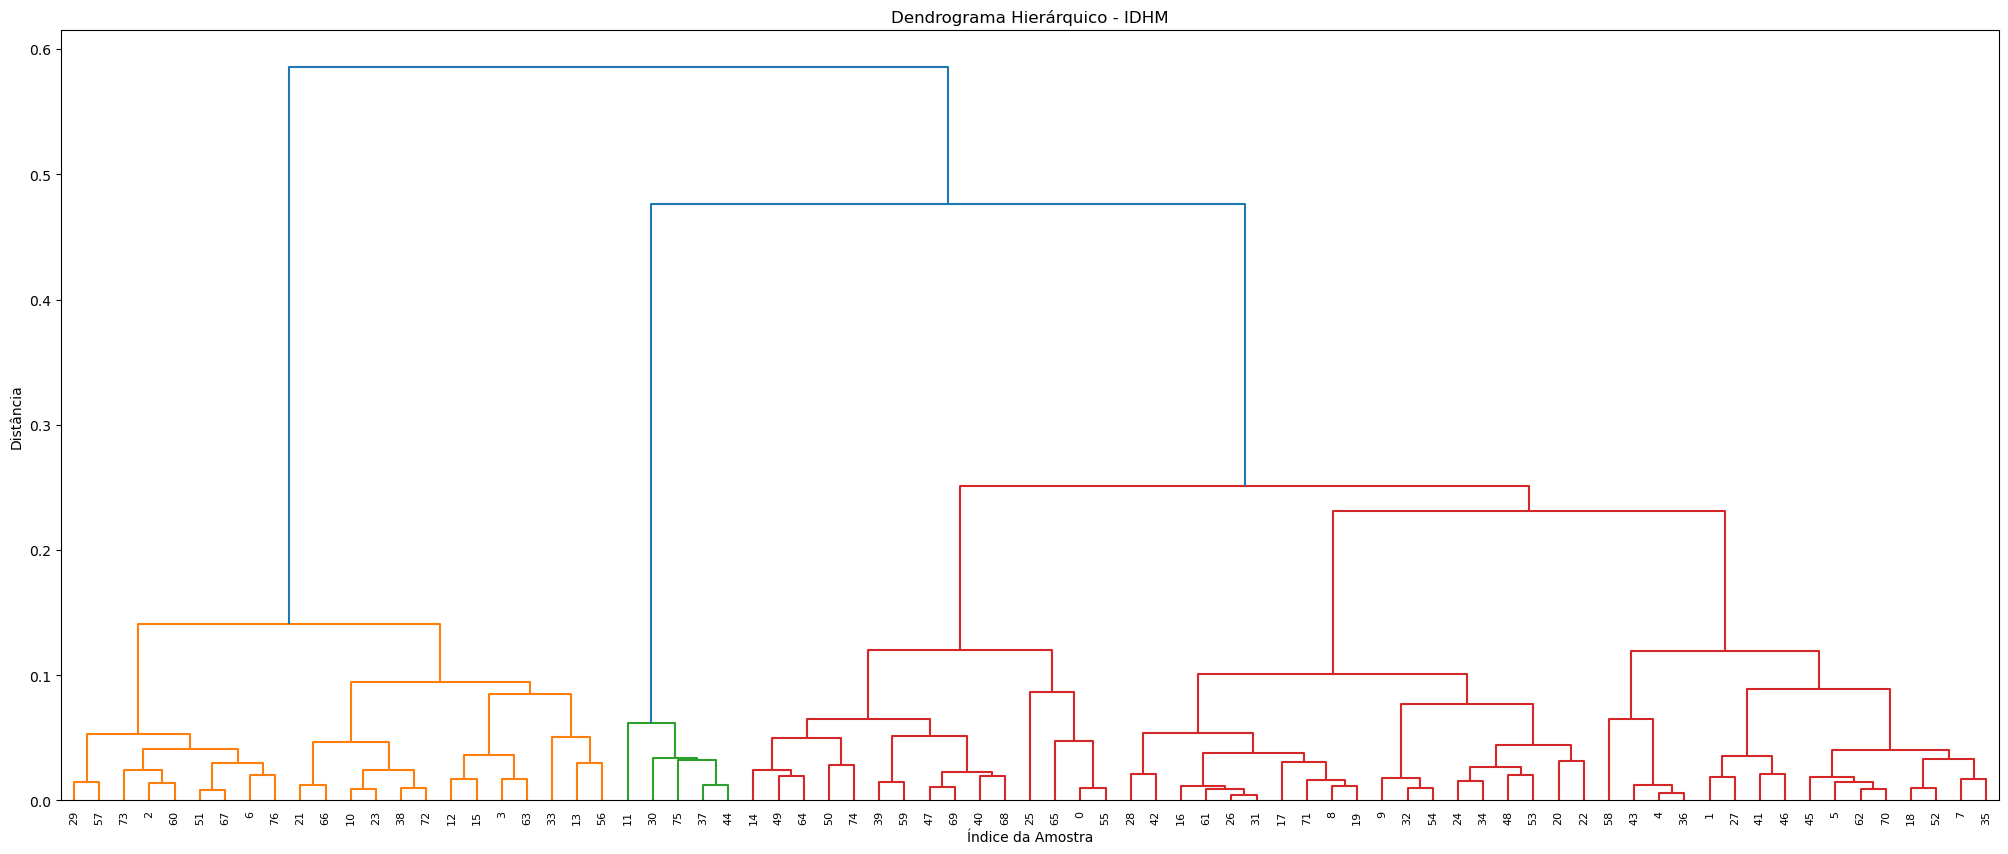

In [40]:
# Selecionando apenas as colunas de interesse
colunas_idhm = ['IDHM 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010']
df_idhm = df_unido[colunas_idhm]

# Aplicando Classificação Hierárquica Ascendente
Z = linkage(df_idhm, method='ward')

# Visualizando o Dendrograma
plt.figure(figsize=(25, 10))
plt.title('Dendrograma Hierárquico - IDHM')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação dos rótulos das folhas
    leaf_font_size=8.,  # tamanho da fonte dos rótulos das folhas
)
plt.show()


In [41]:
# Definir o número de clusters desejado
n_clusters = 5

# Cortar o dendrograma para formar n_clusters
clusters = fcluster(Z, n_clusters, criterion='maxclust')

# Adicionar os rótulos dos clusters ao DataFrame original
df_unido['Cluster'] = clusters


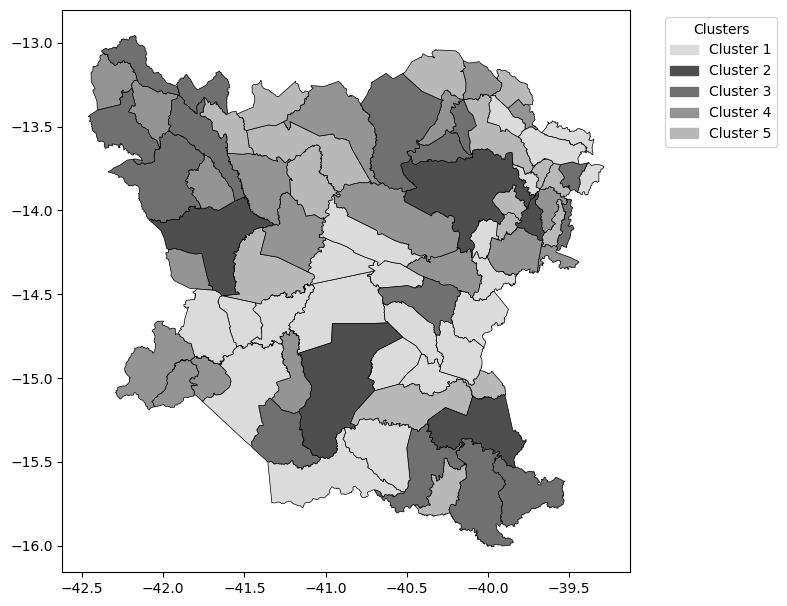

In [42]:
import matplotlib.colors
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supondo que 'geometry' é a coluna com os dados geográficos
gdf = gpd.GeoDataFrame(df_unido, geometry='geometry')

# Definindo as cores para cada cluster
cores = ['#DBDBDB', '#4E4E4E', '#707070', '#949495', '#B8B8B9']

# Criando um colormap personalizado
cmap = matplotlib.colors.ListedColormap(cores)

# Plotar o mapa
fig, ax = plt.subplots(figsize=(8, 8))  # Ajuste o tamanho conforme necessário
gdf.plot(column='Cluster', ax=ax, categorical=True, cmap=cmap, edgecolor='black', linewidth=0.5)

# Criando uma legenda personalizada
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
legend_patches = [Patch(color=cores[i], label=legend_labels[i]) for i in range(len(legend_labels))]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title='Clusters')

plt.tight_layout()
plt.show()


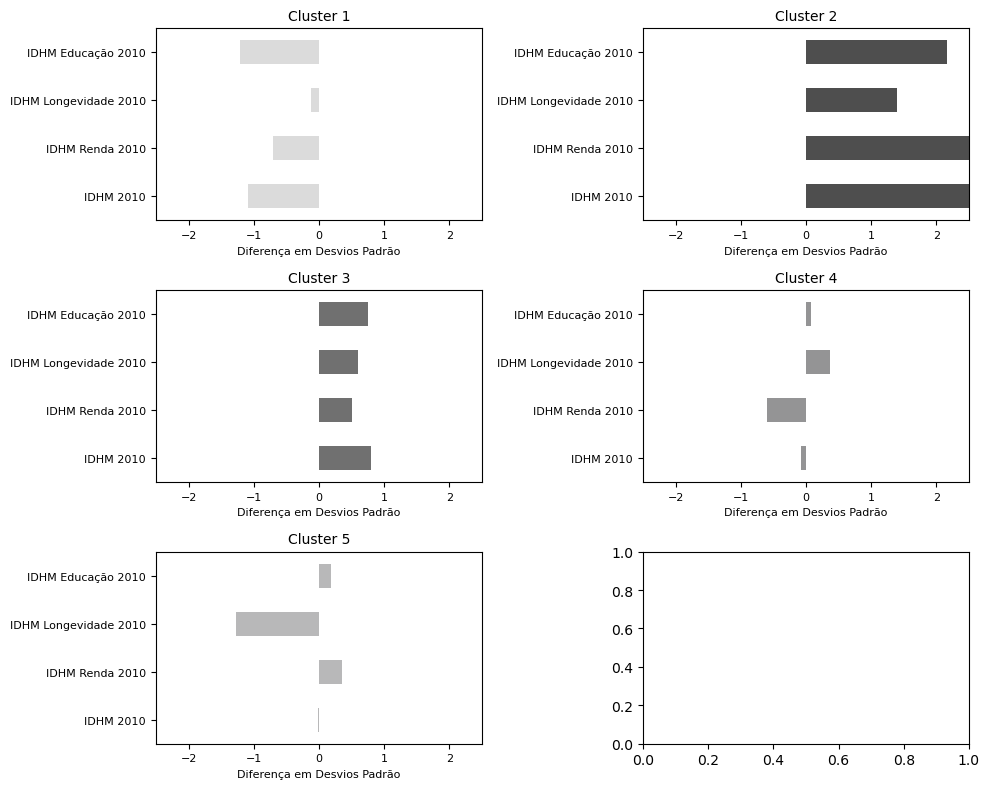

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo df_unido e variáveis já definidas

cluster_variable = 'Cluster'
variables = ['IDHM 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010', 'IDHM Educação 2010']
# Número de clusters
num_clusters = df_unido[cluster_variable].nunique()

# Configurando o número de linhas e colunas, ajustando o tamanho do layout
num_linhas = 3
num_colunas = 2
figsize_ajustado = (10, 8)  # Ajuste o tamanho conforme desejado para diminuir os gráficos

# Tamanho da fonte para títulos e rótulos
tamanho_fonte_titulo = 10
tamanho_fonte_rotulos = 8

# Tamanho do layout ajustado
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=figsize_ajustado, constrained_layout=True)

# Definindo uma lista de cores
cores = ['#DBDBDB', '#4E4E4E', '#707070', '#949495', '#B8B8B9']

# Iterando sobre cada cluster
for cluster in range(1, num_clusters + 1):
    # Selecionando o subplot apropriado
    ax = axs[(cluster - 1) // num_colunas, (cluster - 1) % num_colunas]
    
    # Selecionando apenas as observações pertencentes ao cluster atual
    cluster_data = df_unido[df_unido[cluster_variable] == cluster]

    # Calculando a diferença em termos de desvios padrão em relação à média global
    cluster_diff = (cluster_data[variables].mean() - df_unido[variables].mean()) / df_unido[variables].std()

    # Criando um gráfico de barras horizontal com a cor específica
    cluster_diff.plot(kind='barh', color=cores[cluster - 1], xlim=(-2.5, 2.5), legend=False, ax=ax)
    
    # Adicionando título e rótulos com tamanho de fonte reduzido
    ax.set_title(f'Cluster {cluster}', fontsize=tamanho_fonte_titulo)
    ax.set_xlabel('Diferença em Desvios Padrão', fontsize=tamanho_fonte_rotulos)
    ax.tick_params(axis='both', which='major', labelsize=tamanho_fonte_rotulos)

plt.tight_layout()
plt.show()


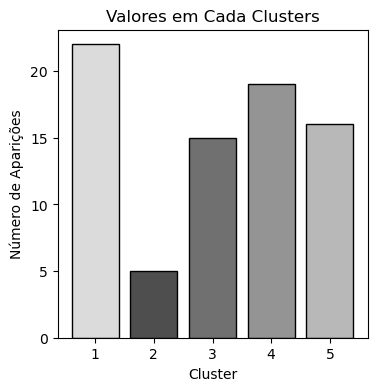

In [44]:
# Cores específicas para cada cluster
cores = ['#DBDBDB', '#4E4E4E', '#707070', '#949495', '#B8B8B9']

# Contando o número de aparições de cada cluster e garantindo a ordem correta
contagem_clusters = df_unido['Cluster'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(4, 4))

# Garantindo que as cores sejam aplicadas de acordo com a ordem dos clusters
bars = plt.bar(contagem_clusters.index, contagem_clusters.values, color=cores, edgecolor='black')

plt.title('Valores em Cada Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Aparições')
plt.xticks(contagem_clusters.index, rotation=0)  # Ajusta os rótulos dos eixos x para mostrar os números dos clusters

plt.show()

plt.show()

In [45]:
df_unido.to_csv('D:/UESC/Desenvolvimento/df_unido1.csv', index=False)